<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Библиотеки-и-функции" data-toc-modified-id="Библиотеки-и-функции-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Библиотеки и функции</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#результаты-анализа" data-toc-modified-id="результаты-анализа-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>результаты анализа</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#исключение-не-значащих-признаков" data-toc-modified-id="исключение-не-значащих-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>исключение не значащих признаков</a></span></li><li><span><a href="#обработка-типов-данных" data-toc-modified-id="обработка-типов-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>обработка типов данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#предварительная-подготовка-признаков" data-toc-modified-id="предварительная-подготовка-признаков-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>предварительная подготовка признаков</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BERT</a></span><ul class="toc-item"><li><span><a href="#токенизация" data-toc-modified-id="токенизация-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>токенизация</a></span></li><li><span><a href="#контроль-длинны" data-toc-modified-id="контроль-длинны-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>контроль длинны</a></span></li><li><span><a href="#подготовка-эмбеддингов" data-toc-modified-id="подготовка-эмбеддингов-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>подготовка эмбеддингов</a></span></li><li><span><a href="#обучение-на-основе-признака-title" data-toc-modified-id="обучение-на-основе-признака-title-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>обучение на основе признака title</a></span></li></ul></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>TF-IDF</a></span><ul class="toc-item"><li><span><a href="#подготовка-мешка-слов" data-toc-modified-id="подготовка-мешка-слов-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>подготовка мешка слов</a></span></li><li><span><a href="#обучение-на-основе-признака-tags" data-toc-modified-id="обучение-на-основе-признака-tags-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>обучение на основе признака tags</a></span></li></ul></li><li><span><a href="#подготовка-признаков" data-toc-modified-id="подготовка-признаков-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>подготовка признаков</a></span></li><li><span><a href="#обучение-итоговой-модели" data-toc-modified-id="обучение-итоговой-модели-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>обучение итоговой модели</a></span><ul class="toc-item"><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li></ul></li><li><span><a href="#Предсказание" data-toc-modified-id="Предсказание-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Предсказание</a></span></li><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выгрузка данных</a></span></li></ul></div>

У компании РБК довольно взрослая аудитория, которую она хочет
расширить за счет добавления статей на актуальные темы. Для этого вам
нужно проанализировать лучшие новости российских СМИ и научиться
предсказывать их популярность. Ожидается, что для этого будут
использованы NLP модели.

Цель модели участников — предсказать 3 численные характеристики,
которые в полной мере показывают популярность статьи: views, full reads
percent, depth.
Для оценки качества решения используется метрика R2.

## Библиотеки и функции

In [1]:
import pandas as pd
import numpy as np

import re 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import torch
import transformers
from tqdm import notebook

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
def clear_text(text):
    return re.sub('[\,\]\[\]\']', '',text)#.split(" ")

In [3]:
def score(R2_views, R2_dept, R2_full_reads_percent):
    return 0.4 * R2_views + 0.3 * R2_dept + 0.3 * R2_full_reads_percent

## Загрузка данных

Выполним загрузу датсета

In [4]:
try:
    df_train = pd.read_csv ('D:/Data for projects/RBC/train_dataset_train.csv') 
    df_test = pd.read_csv ('D:/Data for projects/RBC/test_dataset_test.csv')

except: 
    print('error, data not found')

## Обзор данных

Признаки:
- document id - идентификатор
- title - заголовок статьи
- publish_date - время публикации
- session - номер сессии
- authors - код автора
- ctr - показатель кликабельности
- category - категория статьи
- tags - ключевые слова в статье

Целевые признаки:
- views - количество просмотров
- full_reads percent - процент читателей полностью прочитавших статью
- depth - объем прочитанного материала

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
document_id           7000 non-null object
title                 7000 non-null object
publish_date          7000 non-null object
session               7000 non-null object
authors               7000 non-null object
ctr                   7000 non-null float64
category              7000 non-null object
tags                  7000 non-null object
views                 7000 non-null int64
depth                 7000 non-null float64
full_reads_percent    7000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 601.7+ KB


Заменим категорию и автора на число

In [6]:
df_train["category"] = df_train["category"].astype('category')
df_train["category"] = df_train["category"].cat.codes
df_train["category"] = df_train["category"].astype('int')

In [7]:
df_test["category"] = df_test["category"].astype('category')
df_test["category"] = df_test["category"].cat.codes
df_test["category"] = df_test["category"].astype('int')

In [8]:
df_train["authors"] = df_train["authors"].astype('category')
df_train["authors"] = df_train["authors"].cat.codes
df_train["authors"] = df_train["authors"].astype('int')

In [9]:
df_test["authors"] = df_test["authors"].astype('category')
df_test["authors"] = df_test["authors"].cat.codes
df_test["authors"] = df_test["authors"].astype('int')

In [10]:
df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

In [11]:
df_train.head(3)

,document_id,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent,day,mounth
0,624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,Европейский банк развития приостановил доступ ...,2022-04-04 10:29:44,IDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,"['55928d339a794751dc8303d6', '542d1e28cbb20f86...",20460,1.134,35.850,4,4
1,620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,Кремль назвал регулярным процессом учебные зап...,2022-02-18 10:00:39,KtVJsteHStO5oditt3Uvzw,38,1.853,0,"['549d25df9a794775979561d2', '58abcf539a7947f1...",19038,1.142,38.355,18,2
2,620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,Госсекретарь Швеции заявила о нежелании вступа...,2022-02-12 04:24:02,hk7puWJwSziw0m3sfTkKWA,560,0.000,0,"['5430f451cbb20f73931ecd05', '5409f15de063daa0...",51151,1.185,36.424,12,2


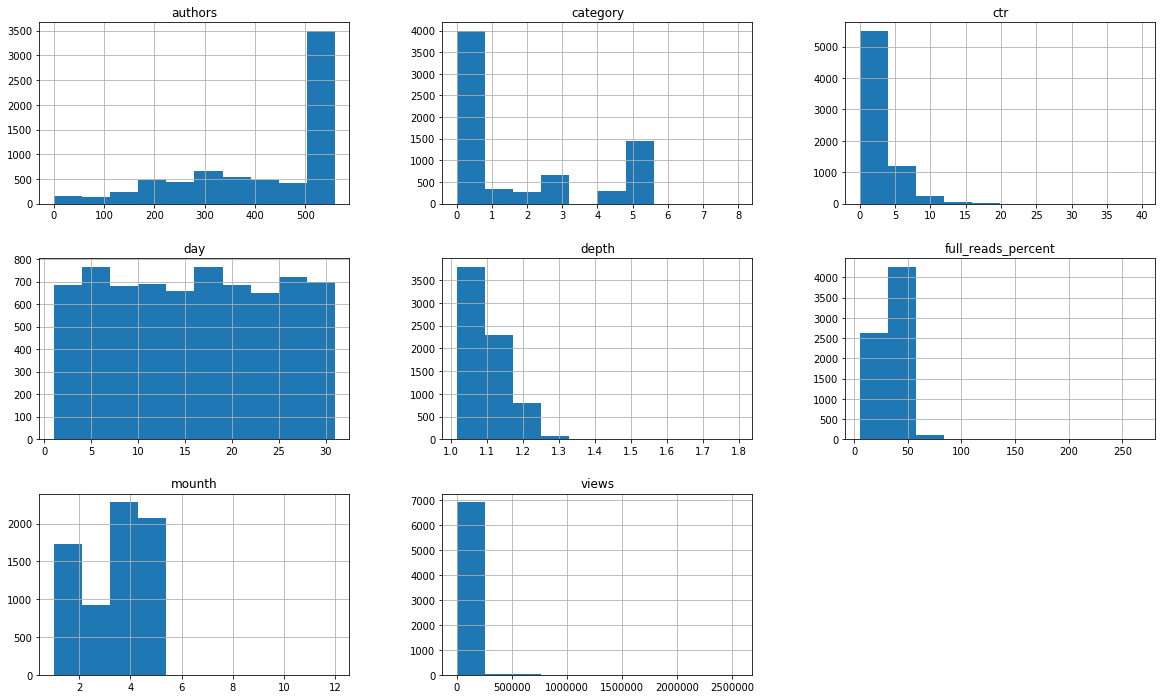

In [12]:
features = list(set(df_train.columns) - set(['publish_date']))

_ = df_train[features].hist(figsize=(20,12))

Всего 9 категорий статей

### результаты анализа

имеющиеся признаки можно разделить на следующие категории

характеризующие актуальность новостного сообщения
- publish_date - время публикации
- ctr - показатель кликабельности

характеризующие содержание новостного сообщения
- title - заголовок статьи
- category - категория статьи
- tags - ключевые слова в статье

характеризующие признаки документа
- document id - идентификатор
- session - номер сессии

косвенно характеризующие "качество" документа (степень экспертизы автора в тематике статьи характеризует ее качество)
- authors - код автора


Целевые признаки:

views - количество просмотров
full_reads percent - процент читателей полностью прочитавших статью
depth - объем прочитанного материала

## Предобработка данных

### исключение не значащих признаков

In [13]:
df_train = df_train.drop(['document_id','session', 'day', 'mounth'],axis=1)
df_test = df_test.drop(['document_id','session'],axis=1)

### обработка типов данных

In [14]:
df_train['publish_date'] = pd.to_datetime(df_train['publish_date'], format='%Y-%m-%d %H:%M:%S')
df_test['publish_date'] = pd.to_datetime(df_test['publish_date'], format='%Y-%m-%d %H:%M:%S')

## Обучение моделей

### предварительная подготовка признаков

In [15]:
features = df_train.drop(['views', 'full_reads_percent', 'depth'],axis=1) 

target = df_train[['views', 'depth','full_reads_percent']]

In [16]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.5, random_state=404) #выделение тестовой выборки

In [17]:
print(features_train.shape, 
      features_valid.shape, 
      target_train.shape, 
      target_valid.shape
     )

(3500, 6) (3500, 6) (3500, 3) (3500, 3)


### BERT

In [18]:
features_BERT = features['title']

In [19]:
features_BERT_test = df_test['title']

In [20]:
model_class, tokenizer_class, pretrained_weights = (transformers.BertModel, transformers.BertTokenizer, 'bert-base-uncased')

#### токенизация

In [21]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
tokenized = features_BERT.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [23]:
tokenized_test = features_BERT_test.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

#### контроль длинны 

In [24]:
counter_list = []
counter = 0
for _ in tokenized:
    if np.array(_).size >511:
        counter_list.append(counter)
    counter +=1
    
len(counter_list)

0

In [25]:
max_len = 0
for i in tokenized_test.values:
    if len(i) > max_len:
        max_len = len(i)

padded_test = np.array([i + [0]*(max_len-len(i)) for i in tokenized_test.values])

In [26]:
n = tokenized.apply(lambda x: np.array(x).size).max()
n

143

In [27]:
n_test = tokenized_test.apply(lambda x: np.array(x).size).max()
n_test

142

#### подготовка эмбеддингов

In [28]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [29]:
max_len = 0
for i in tokenized_test.values:
    if len(i) > max_len:
        max_len = len(i)

padded_test = np.array([i + [0]*(max_len-len(i)) for i in tokenized_test.values])

In [30]:
np.array(padded).shape

(7000, 143)

In [31]:
padded= padded.astype('int64')

In [32]:
padded_test= padded_test.astype('int64')

In [33]:
attention_mask_test = np.where(padded_test != 0, 1, 0).astype('int64')
attention_mask_test.shape

(3000, 142)

In [34]:
attention_mask = np.where(padded != 0, 1, 0).astype('int64')
attention_mask.shape

(7000, 143)

In [35]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

In [36]:
input_ids_test = torch.tensor(padded_test)  
attention_mask_test = torch.tensor(attention_mask_test)

In [37]:
%%time

batch_size = 5
embeddings = []
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features_BERT = np.concatenate(embeddings)        

  0%|          | 0/1400 [00:00<?, ?it/s]

Wall time: 43min 2s


In [38]:
%%time

batch_size = 5
embeddings = []
for i in notebook.tqdm(range(input_ids_test.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids_test[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask_test[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features_BERT_test = np.concatenate(embeddings)  

  0%|          | 0/600 [00:00<?, ?it/s]

Wall time: 19min 7s


#### обучение на основе признака title

In [39]:
features_BERT_train = pd.DataFrame(features_BERT).loc[features_train.index,:]
features_BERT_valid = pd.DataFrame(features_BERT).loc[features_valid.index,:]
target_BERT_train = target_train
target_BERT_valid = target_valid

In [40]:
model_title_1 =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=284, 
                                loss_function='RMSE'
                                           ) 
model_title_2 =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=284, 
                                loss_function='RMSE'
                                           ) 
model_title_3 =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=284, 
                                loss_function='RMSE'
                                           ) 

In [41]:
model_title_1.fit(features_BERT_train, target_BERT_train['views']) # обучение
model_title_2.fit(features_BERT_train, target_BERT_train['depth']) # обучение
model_title_3.fit(features_BERT_train, target_BERT_train['full_reads_percent']) # обучение

predictions_title_valid_1 = model_title_1.predict(features_BERT_valid) #предсказание
predictions_title_valid_2 = model_title_2.predict(features_BERT_valid) #предсказание
predictions_title_valid_3 = model_title_3.predict(features_BERT_valid) #предсказание

Learning rate set to 0.138866
0:	learn: 117732.9638140	total: 265ms	remaining: 1m 15s
1:	learn: 114181.6615278	total: 354ms	remaining: 49.9s
2:	learn: 112382.7451960	total: 435ms	remaining: 40.7s
3:	learn: 107008.9539184	total: 556ms	remaining: 39s
4:	learn: 103501.5256036	total: 650ms	remaining: 36.3s
5:	learn: 100745.4923892	total: 750ms	remaining: 34.8s
6:	learn: 98728.2140418	total: 855ms	remaining: 33.8s
7:	learn: 95772.7824993	total: 961ms	remaining: 33.2s
8:	learn: 93914.7668903	total: 1.07s	remaining: 32.7s
9:	learn: 91790.2733983	total: 1.21s	remaining: 33.3s
10:	learn: 89148.9390878	total: 1.33s	remaining: 32.9s
11:	learn: 86907.8552157	total: 1.44s	remaining: 32.7s
12:	learn: 85491.7251804	total: 1.54s	remaining: 32.1s
13:	learn: 83544.6765547	total: 1.65s	remaining: 31.8s
14:	learn: 82005.6938654	total: 1.74s	remaining: 31.2s
15:	learn: 80676.1190280	total: 1.82s	remaining: 30.5s
16:	learn: 78631.6824132	total: 1.93s	remaining: 30.3s
17:	learn: 77524.2581093	total: 2.01s	re

In [42]:
predictions_title_valid = pd.DataFrame()

predictions_title_valid['views'] = predictions_title_valid_1
predictions_title_valid['depth'] = predictions_title_valid_2
predictions_title_valid['full_reads_percent'] = predictions_title_valid_3

In [43]:
print(f'Значение метрики R2 для модели, обученной на признаке title: {r2_score(target_BERT_valid, predictions_title_valid)}')

Значение метрики R2 для модели, обученной на признаке title: 0.0559700549153647


### TF-IDF

#### подготовка мешка слов

In [44]:
features_TF_IDF = features_train['tags']
features_TF_IDF_valid = features_valid['tags']
features_TF_IDF_test = df_test['tags']

In [45]:
features_TF_IDF = features_TF_IDF.apply(clear_text)
features_TF_IDF_valid = features_TF_IDF_valid.apply(clear_text)
features_TF_IDF_test = features_TF_IDF_test.apply(clear_text)

In [46]:
count_tf_idf = TfidfVectorizer() 
tf_idf = count_tf_idf.fit_transform(features_TF_IDF)
tf_idf_valid = count_tf_idf.transform(features_TF_IDF_valid)
tf_idf_test = count_tf_idf.transform(features_TF_IDF_test)

#### обучение на основе признака tags

In [47]:
features_TF_IDF = tf_idf
features_TF_IDF_valid = tf_idf_valid
features_TF_IDF_test = tf_idf_test

In [48]:
model_tags_1 =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=284, 
                                loss_function='RMSE'
                                           ) 
model_tags_2 =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=284, 
                                loss_function='RMSE'
                                           ) 
model_tags_3 =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=284, 
                                loss_function='RMSE'
                                           ) 

In [49]:
model_tags_1.fit(features_TF_IDF, target_train['views']) # обучение
model_tags_2.fit(features_TF_IDF, target_train['depth']) # обучение
model_tags_3.fit(features_TF_IDF, target_train['full_reads_percent']) # обучение

predictions_tags_valid_1 = model_tags_1.predict(features_TF_IDF_valid) #предсказание
predictions_tags_valid_2 = model_tags_2.predict(features_TF_IDF_valid) #предсказание
predictions_tags_valid_3 = model_tags_3.predict(features_TF_IDF_valid) #предсказание

Learning rate set to 0.138866
0:	learn: 114793.3838290	total: 33ms	remaining: 9.33s
1:	learn: 107493.4419655	total: 60ms	remaining: 8.46s
2:	learn: 100625.6419710	total: 83.1ms	remaining: 7.79s
3:	learn: 94556.2976563	total: 104ms	remaining: 7.28s
4:	learn: 89637.9912720	total: 120ms	remaining: 6.7s
5:	learn: 84802.2284519	total: 136ms	remaining: 6.3s
6:	learn: 80526.5744059	total: 151ms	remaining: 5.99s
7:	learn: 79997.4196886	total: 187ms	remaining: 6.44s
8:	learn: 76248.2143296	total: 210ms	remaining: 6.41s
9:	learn: 75763.6539670	total: 225ms	remaining: 6.17s
10:	learn: 75299.8871591	total: 240ms	remaining: 5.96s
11:	learn: 72142.9321385	total: 256ms	remaining: 5.8s
12:	learn: 71721.1655795	total: 279ms	remaining: 5.82s
13:	learn: 68754.5955921	total: 298ms	remaining: 5.74s
14:	learn: 66246.5022955	total: 316ms	remaining: 5.67s
15:	learn: 65875.3821396	total: 332ms	remaining: 5.56s
16:	learn: 63723.8157721	total: 347ms	remaining: 5.45s
17:	learn: 63388.7128527	total: 362ms	remainin

In [50]:
predictions_tags_valid = pd.DataFrame()

predictions_tags_valid['views'] = predictions_tags_valid_1
predictions_tags_valid['depth'] = predictions_tags_valid_2
predictions_tags_valid['full_reads_percent'] = predictions_tags_valid_3

In [51]:
print(f'Значение метрики R2 для модели, обученной на признаке title: {r2_score(target_valid, predictions_tags_valid)}')

Значение метрики R2 для модели, обученной на признаке title: -0.11670422472997517


### подготовка признаков

In [52]:
predictions_title_valid.head()

,views,depth,full_reads_percent
0,58892.086965,1.104259,38.838135
1,32412.695809,1.080118,32.484672
2,34764.218801,1.084642,28.213662
3,18866.782124,1.101136,41.114046
4,-2168.911962,1.120768,40.939078


In [53]:
features_result = features_valid.drop(['title','tags'], axis=1)
features_result['title_pred_views'] = predictions_title_valid['views']
features_result['title_pred_depth'] = predictions_title_valid['depth']
features_result['title_pred_full_reads_percent'] = predictions_title_valid['full_reads_percent'] 

In [55]:
features_result['tags_pred_views'] = predictions_tags_valid['views']
features_result['tags_pred_depth'] = predictions_tags_valid['depth']
features_result['tags_pred_full_reads_percent'] = predictions_tags_valid['full_reads_percent'] 

### обучение итоговой модели

#### CatBoostRegressor

In [56]:
%%time
model = CatBoostRegressor()

parameters = {'n_estimators' : sp_randInt(100, 300),
              'max_depth'    : sp_randInt(1, 10)}

randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1, scoring='r2')
randm_src.fit(features_result,target_valid['views'])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

Learning rate set to 0.180289
0:	learn: 54177.6142482	total: 5.59ms	remaining: 1.15s
1:	learn: 51318.5378437	total: 9.95ms	remaining: 1.01s
2:	learn: 49547.9677409	total: 13.3ms	remaining: 903ms
3:	learn: 47630.9947586	total: 16.5ms	remaining: 831ms
4:	learn: 46134.2159868	total: 19.6ms	remaining: 788ms
5:	learn: 45167.3995520	total: 22.5ms	remaining: 749ms
6:	learn: 44453.8775049	total: 25.7ms	remaining: 729ms
7:	learn: 43529.0044991	total: 28.9ms	remaining: 716ms
8:	learn: 42704.9100173	total: 32.1ms	remaining: 702ms
9:	learn: 42045.9500260	total: 35.4ms	remaining: 694ms
10:	learn: 41980.5435481	total: 38.3ms	remaining: 680ms
11:	learn: 41545.9734617	total: 41.6ms	remaining: 672ms
12:	learn: 41464.9719065	total: 44.5ms	remaining: 660ms
13:	learn: 41298.3554972	total: 47.5ms	remaining: 651ms
14:	learn: 40920.3375485	total: 50.8ms	remaining: 647ms
15:	learn: 40880.1156360	total: 54.3ms	remaining: 644ms
16:	learn: 40641.3890136	total: 58.4ms	remaining: 649ms
17:	learn: 40588.5803717	tot

In [57]:
model_catboost_views =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=284, 
                                loss_function='RMSE'
                                           ) 

In [58]:
%%time
model = CatBoostRegressor()

parameters = {'n_estimators' : sp_randInt(100, 300),
              'max_depth'    : sp_randInt(1, 10)}

randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1, scoring='r2')
randm_src.fit(features_result,target_valid['depth'])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

Learning rate set to 0.143398
0:	learn: 0.0557606	total: 4.83ms	remaining: 1.31s
1:	learn: 0.0515825	total: 8.8ms	remaining: 1.19s
2:	learn: 0.0474966	total: 12.6ms	remaining: 1.13s
3:	learn: 0.0447535	total: 16.9ms	remaining: 1.13s
4:	learn: 0.0420354	total: 21ms	remaining: 1.13s
5:	learn: 0.0403474	total: 25.5ms	remaining: 1.14s
6:	learn: 0.0390082	total: 29.8ms	remaining: 1.13s
7:	learn: 0.0378081	total: 33.6ms	remaining: 1.11s
8:	learn: 0.0368926	total: 37.4ms	remaining: 1.1s
9:	learn: 0.0362106	total: 41.3ms	remaining: 1.09s
10:	learn: 0.0356293	total: 45ms	remaining: 1.07s
11:	learn: 0.0347031	total: 49.3ms	remaining: 1.07s
12:	learn: 0.0342191	total: 54.2ms	remaining: 1.08s
13:	learn: 0.0339392	total: 59.9ms	remaining: 1.11s
14:	learn: 0.0334302	total: 64.9ms	remaining: 1.12s
15:	learn: 0.0330344	total: 69.4ms	remaining: 1.11s
16:	learn: 0.0328063	total: 73.1ms	remaining: 1.1s
17:	learn: 0.0324923	total: 77.1ms	remaining: 1.09s
18:	learn: 0.0321375	total: 80.7ms	remaining: 1.08s

In [59]:
model_catboost_depth =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=4,
                                n_estimators=180, 
                                loss_function='RMSE'
                                           ) 

In [60]:
%%time
model = CatBoostRegressor()

parameters = {'n_estimators' : sp_randInt(100, 300),
              'max_depth'    : sp_randInt(1, 13)}

randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1, scoring='r2')
randm_src.fit(features_result,target_valid['full_reads_percent'])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

Learning rate set to 0.193365
0:	learn: 10.5637977	total: 1.15ms	remaining: 216ms
1:	learn: 10.2853762	total: 2.5ms	remaining: 234ms
2:	learn: 10.1184766	total: 3.87ms	remaining: 240ms
3:	learn: 10.0090349	total: 5.1ms	remaining: 236ms
4:	learn: 9.8954129	total: 6.37ms	remaining: 234ms
5:	learn: 9.8298841	total: 7.77ms	remaining: 237ms
6:	learn: 9.7878318	total: 9.17ms	remaining: 238ms
7:	learn: 9.7257085	total: 10.4ms	remaining: 236ms
8:	learn: 9.6868623	total: 11.7ms	remaining: 234ms
9:	learn: 9.6688923	total: 12.9ms	remaining: 231ms
10:	learn: 9.6491625	total: 14.2ms	remaining: 229ms
11:	learn: 9.6286882	total: 15.4ms	remaining: 227ms
12:	learn: 9.6176562	total: 16.7ms	remaining: 226ms
13:	learn: 9.6018162	total: 17.9ms	remaining: 224ms
14:	learn: 9.5865321	total: 19.3ms	remaining: 224ms
15:	learn: 9.5612192	total: 20.6ms	remaining: 223ms
16:	learn: 9.5503725	total: 21.9ms	remaining: 221ms
17:	learn: 9.5305071	total: 23.2ms	remaining: 220ms
18:	learn: 9.5138747	total: 24.5ms	remaini

In [61]:
model_catboost_full_reads_percent =  CatBoostRegressor(
                                random_state=404,  
                                max_depth=5,
                                n_estimators=211, 
                                loss_function='RMSE'
                                           ) 

In [62]:
model_catboost_views.fit(features_result,target_valid['views'], verbose=100) 
model_catboost_depth.fit(features_result,target_valid['depth'], verbose=100) 
model_catboost_full_reads_percent.fit(features_result,target_valid['full_reads_percent'], verbose=100) 


scores_catboost_views = cross_val_score(model_catboost_views, features_result,target_valid['views'], cv=5, scoring='r2') 
scores_catboost_depth = cross_val_score(model_catboost_depth, features_result,target_valid['views'], cv=5, scoring='r2')
scores_catboost_full_reads_percent = cross_val_score(model_catboost_full_reads_percent, features_result,target_valid['views'], cv=5, scoring='r2')

Learning rate set to 0.138866
0:	learn: 54772.2126745	total: 12.7ms	remaining: 3.6s
100:	learn: 32377.3602663	total: 372ms	remaining: 674ms
200:	learn: 26707.0630955	total: 747ms	remaining: 309ms
283:	learn: 23435.4445142	total: 988ms	remaining: 0us
Learning rate set to 0.20119
0:	learn: 0.0539615	total: 2.25ms	remaining: 402ms
100:	learn: 0.0275722	total: 249ms	remaining: 195ms
179:	learn: 0.0256083	total: 420ms	remaining: 0us
Learning rate set to 0.176807
0:	learn: 10.5208750	total: 3.63ms	remaining: 762ms
100:	learn: 7.6157493	total: 328ms	remaining: 357ms
200:	learn: 6.9106285	total: 597ms	remaining: 29.7ms
210:	learn: 6.8571721	total: 622ms	remaining: 0us
Learning rate set to 0.134055
0:	learn: 54761.6855155	total: 3.16ms	remaining: 894ms
1:	learn: 53009.2395067	total: 6.25ms	remaining: 881ms
2:	learn: 51516.1425957	total: 9.61ms	remaining: 900ms
3:	learn: 50164.4566261	total: 12.7ms	remaining: 887ms
4:	learn: 48947.7756898	total: 15.9ms	remaining: 889ms
5:	learn: 47911.8075251	to

In [63]:
print(scores_catboost_views.mean(),
      scores_catboost_depth.mean(),
      scores_catboost_full_reads_percent.mean()
     )

0.3927924112636928 0.3942143418366736 0.3948277898839613


In [64]:
score (scores_catboost_views.mean(),
      scores_catboost_depth.mean(),
      scores_catboost_full_reads_percent.mean())

0.39382960402166756

## Предсказание

предсказание по признаку title

In [65]:
predictions_title_test = pd.DataFrame()

predictions_title_test['views'] = model_title_1.predict(features_BERT_test)
predictions_title_test['depth'] =  model_title_2.predict(features_BERT_test)
predictions_title_test['full_reads_percent'] = model_title_3.predict(features_BERT_test)

предсказание по признаку tags

In [66]:
predictions_tags_test = pd.DataFrame()

predictions_tags_test['views'] = model_tags_1.predict(features_TF_IDF_test)
predictions_tags_test['depth'] =  model_tags_2.predict(features_TF_IDF_test)
predictions_tags_test['full_reads_percent'] = model_tags_3.predict(features_TF_IDF_test)

сбор признаков для итоговой модели

In [67]:
features_test_result = df_test.drop(['title','tags'], axis=1)
features_test_result['title_pred_views'] = predictions_title_test['views']
features_test_result['title_pred_depth'] = predictions_title_test['depth']
features_test_result['title_pred_full_reads_percent'] = predictions_title_test['full_reads_percent']

In [68]:
features_test_result['tags_pred_views'] = predictions_tags_test['views']
features_test_result['tags_pred_depth'] = predictions_tags_test['depth']
features_test_result['tags_pred_full_reads_percent'] = predictions_tags_test['full_reads_percent']

предсказание итоговой модели

In [69]:
scores_catboost_test_views = model_catboost_views.predict(features_test_result)

scores_catboost_test_depth = model_catboost_depth.predict(features_test_result)

scores_catboost_test_full_reads_percent = model_catboost_full_reads_percent.predict(features_test_result)

сбор результатов предсказания

In [78]:
df_test = pd.read_csv ('D:/Data for projects/RBC/test_dataset_test.csv')

In [79]:
result = pd.DataFrame()
result['document_id'] = df_test['document_id']
result['views'] = scores_catboost_test_views
result['depth'] = scores_catboost_test_depth
result['full_reads_percent'] = scores_catboost_test_full_reads_percent

In [80]:
result['views'] = result['views'].apply(int)
result['depth'] = round(result['depth'],3)
result['full_reads_percent'] = round(result['full_reads_percent'],3)

In [112]:
result

,document_id,views,depth,full_reads_percent
0,61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,22670,1.138,36.335
1,628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,6428,1.063,33.182
2,627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,5450,1.064,35.991
3,628618629a7947d4927eb812upfii3whSSuMXCqcqF8VbQ,5478,1.064,40.217
4,620e76109a7947235623695b5hzCiIHdSYKQIr8WAM18bw,29765,1.177,31.185
...,...,...,...,...
2995,623ba6bc9a79470214cb9418x4OZQ1IjTb27nPAgv5wAZg,42982,1.144,30.422
2996,624fda1f9a79471a9bd102eetuRTrLPGSZyNbc9_YcBAeQ,67028,1.149,29.349
2997,6257a6a99a79477eea75b86dtBr3UG9ORW-gOybkVKX6ww,3805,1.064,38.335
2998,624866d59a7947421716ab46WsGDKyGjTJGRh14eR7UVvw,10627,1.163,38.910


## Выгрузка данных

In [110]:
result.to_csv('D:/Data for projects/prediction.csv', index = False)